In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import h5py 
import anndata
import Go_annotations as go_an
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import CococoNet_reader
import pickle

In [2]:

 
data = {'A': [45, 37, 42, 50],
        'B': [38, 31, 26, 90],
        'C': [10, 15, 17, 100],
        'D': [60, 99, 23, 56],
        'E': [76, 98, 78, 90]
        }
 
df = pd.DataFrame(data)

In [3]:
df

,A,B,C,D,E
0,45,38,10,60,76
1,37,31,15,99,98
2,42,26,17,23,78
3,50,90,100,56,90


In [4]:
data

{'A': [45, 37, 42, 50],
 'B': [38, 31, 26, 90],
 'C': [10, 15, 17, 100],
 'D': [60, 99, 23, 56],
 'E': [76, 98, 78, 90]}

In [5]:
arabi_coco_net = CococoNet_reader.read_cococonet('arabidopsis')

In [7]:
single_cell_h5py = h5py.File('/data/passala/Data_from_CoCoCoNet/single_cell_data/Ara_data.hdf5','r')
list(single_cell_h5py.keys())

['coldata', 'embedding', 'normalized_counts', 'rowdata']

In [8]:
col_data = single_cell_h5py['coldata']
row_data = single_cell_h5py['rowdata']
embedding_data = single_cell_h5py['embedding']
normalized_counts = single_cell_h5py['normalized_counts']

In [29]:
embedding_data[0]

(14.42939874, 2.38557958, b'AAACCTGAGAAGGTTT-1')

In [31]:
col_data[0]

(10, 1, 1, 15, 8)

In [99]:

row_data_decoded = []

for gene_name in row_data:
    row_data_decoded.append(gene_name[0].decode())

cell_type_number =[]
study_number = []
study_id = []
batch_cluster = []
meta_cluster = []
umap_coordinates = []

for cell_identity in col_data:
    cell_type_number.append(cell_identity[0])  
    study_number.append(cell_identity[1])
    study_id.append(cell_identity[2])
    batch_cluster.append(cell_identity[3])
    meta_cluster.append(cell_identity[4])

barcode_for_each_cell = [] 
for barcode in embedding_data:
    barcode_for_each_cell.append(barcode[2])
    current_umap_coordinates =[barcode[1],barcode[0]]
    umap_coordinates.append(current_umap_coordinates)
        

In [100]:
umap_coordinates = np.array(umap_coordinates)
umap_coordinates

array([[  2.38557958,  14.42939874],
       [ -5.69063256,   0.97071371],
       [ -0.16809239, -11.2200489 ],
       ...,
       [  1.42048877,  10.66337922],
       [  0.05778763, -10.31737532],
       [  2.55937361, -14.17674004]])

In [101]:
obs_arabidop = pd.DataFrame(index = barcode_for_each_cell, data = list(zip(cell_type_number,study_number,batch_cluster, meta_cluster)), columns = ['Cell Type','Study Number','Batch Cluster','Meta Cluster'] )

vars_arabidop = pd.DataFrame(index = row_data_decoded)


In [102]:
obs_arabidop.loc[obs_arabidop['Study Number']== 3
]

,Cell Type,Study Number,Batch Cluster,Meta Cluster
b'WT1_WT1_AAACCTGAGACAGACC',1,3,41,4
b'WT1_WT1_AAACCTGAGATCCGAG',1,3,41,4
b'WT1_WT1_AAACCTGAGTGTGAAT',2,3,42,1
b'WT1_WT1_AAACCTGCAAAGAATC',1,3,41,4
b'WT1_WT1_AAACCTGCAAAGGAAG',13,3,48,7
...,...,...,...,...
b'WT3_WT3_TTTGTCAGTCTGCGGT',8,3,43,7
b'WT3_WT3_TTTGTCAGTTCCACTC',12,3,47,5
b'WT3_WT3_TTTGTCATCCTCCTAG',1,3,41,4
b'WT3_WT3_TTTGTCATCTCGATGA',10,3,45,2


In [103]:
single_cell_arabidopsis_root_4_datasets = anndata.AnnData(X = normalized_counts[:],obs = obs_arabidop, var = vars_arabidop)
single_cell_arabidopsis_root_4_datasets.obsm['X_umap'] = umap_coordinates
# single_cell_arabidopsis_root_4_datasets.X.value = normalized_counts[:]
# single_cell_arabidopsis_root_4_datasets.X.shape()


In [104]:
umap_df = pd.DataFrame(data = single_cell_arabidopsis_root_4_datasets.obsm['X_umap'], columns = ['Axis 1','Axis 2'], index = barcode_for_each_cell)

In [105]:
bad_values = umap_df.sort_values(by = 'Axis 1', ascending = False).head(6).index

In [106]:
single_cell_arabidopsis_root_4_datasets.obs.loc[bad_values]

,Cell Type,Study Number,Batch Cluster,Meta Cluster
b'WT3_WT3_ACTGATGTCAACGGGA',11,3,46,3
b'TTGGAACTCACTTATC.1',5,2,8,3
b'TGAAAGAGTTTAAGCC.1',5,2,8,3
b'GGGATGAGTGGGTATG.1',5,2,8,3
b'CGCTTCATCTTGCCGT.1',5,2,8,3
b'AGTTGGTGTTCAGGCC-1',13,1,21,3


In [107]:
good_obs = single_cell_arabidopsis_root_4_datasets.obs.loc[~single_cell_arabidopsis_root_4_datasets.obs.index.isin(bad_values)]


In [108]:
single_cell_no_bad_obs  = single_cell_arabidopsis_root_4_datasets[good_obs.index,:]
single_cell_no_bad_obs

View of AnnData object with n_obs × n_vars = 16635 × 22271
    obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster'
    obsm: 'X_umap'

In [109]:
len(single_cell_no_bad_obs.obsm['X_umap'])

16635

In [110]:
single_cell_arabidopsis_root_4_datasets

AnnData object with n_obs × n_vars = 16641 × 22271
    obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster'
    obsm: 'X_umap'

In [125]:
sc.set_figure_params(facecolor = 'white', figsize = (20,16))

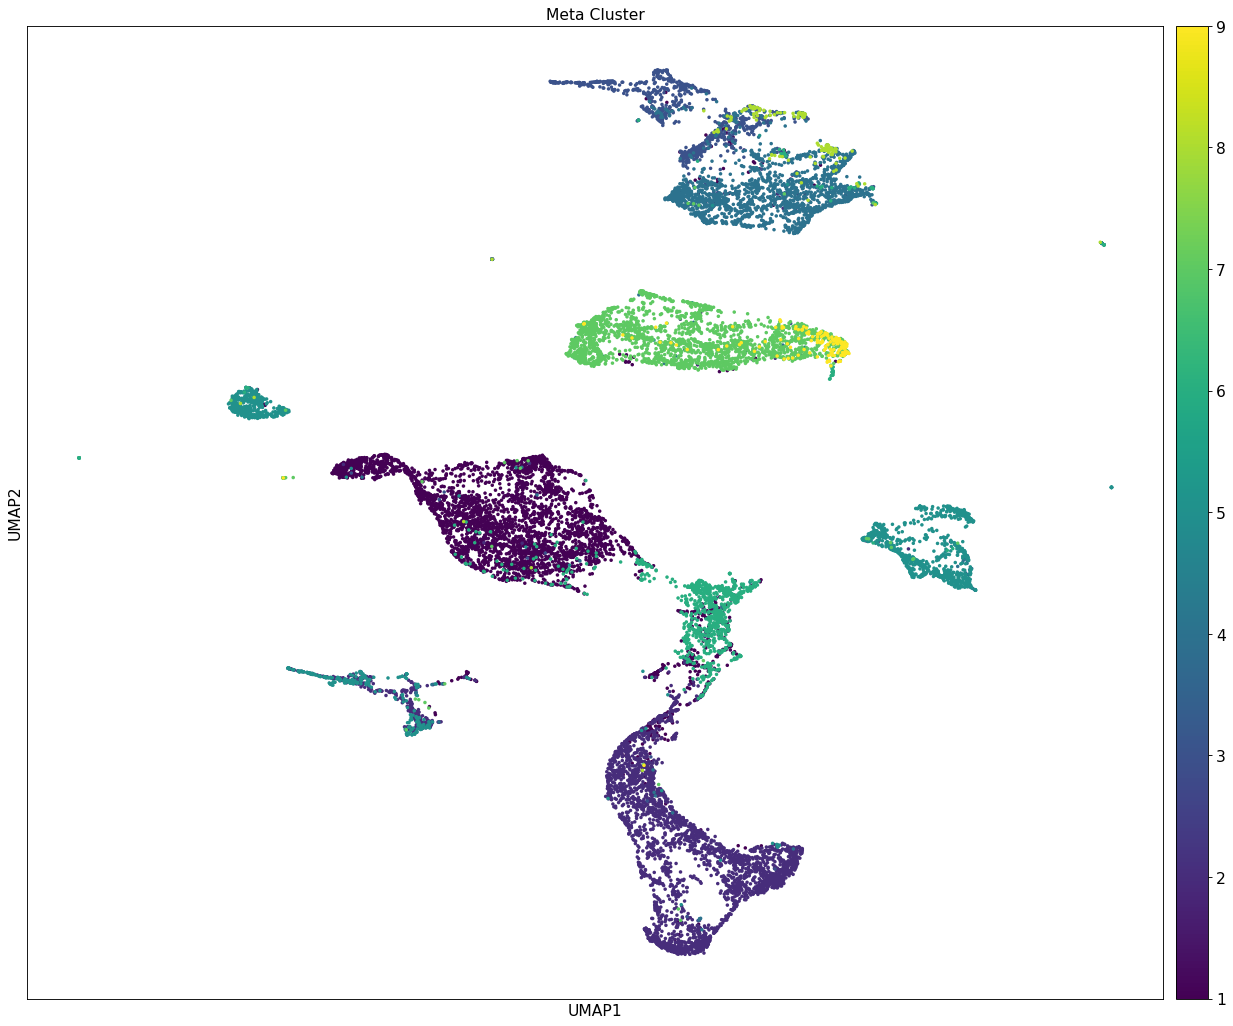

In [131]:
sc.pl.umap(single_cell_no_bad_obs, color= 'Meta Cluster', s = 40, palette = 'Dark2')

In [14]:
single_cell_arabidopsis_root_4_datasets.obs.value_counts('Meta Cluster')

Meta Cluster
1    4284
2    3669
7    2386
4    2135
5    1819
6    1021
3    1020
9     159
8     148
dtype: int64

In [15]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
single_cell_arabidopsis_root_4_datasets

AnnData object with n_obs × n_vars = 16641 × 22271
    obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster'

In [21]:
single_cell_arabidopsis_root_4_datasets.obs

,Cell Type,Study Number,Batch Cluster,Meta Cluster
b'AAACCTGAGAAGGTTT-1',10,1,15,8
b'AAACCTGAGAGTGACC-1',14,1,23,1
b'AAACCTGAGCGATTCT-1',15,1,25,2
b'AAACCTGAGGCTCATT-1',15,1,25,2
b'AAACCTGAGGGTGTTG-1',15,1,25,2
...,...,...,...,...
b'WT3_WT3_TTTGTCAGTCTGCGGT',8,3,43,7
b'WT3_WT3_TTTGTCAGTTCCACTC',12,3,47,5
b'WT3_WT3_TTTGTCATCCTCCTAG',1,3,41,4
b'WT3_WT3_TTTGTCATCTCGATGA',10,3,45,2


In [18]:
quantiles= pd.qcut(single_cell_arabidopsis_root_4_datasets.X.mean(axis = 0),10, labels = [1,2,3,4,5,6,7,8,9,10])

In [27]:
quantiles_pd = pd.DataFrame(data = quantiles, index = single_cell_arabidopsis_root_4_datasets.var_names, columns = ['Quantile'])
quantiles_pd

,Quantile
AT1G01010,8
AT1G01020,8
AT1G01030,5
AT1G01040,6
AT1G01050,10
...,...
ATCG01110,3
ATCG01120,3
ATCG01130,10
ATCG01230,1


In [26]:
quantiles_pd.to_csv('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Temp_tables/quantiles_of_single_cell_genes.csv')

In [16]:
type(single_cell_arabidopsis_root_4_datasets[single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == 1].X)

anndata._core.views.ArrayView

In [17]:
as_array = np.array(single_cell_arabidopsis_root_4_datasets[single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == 1].X)
as_array[as_array == 0] = np.nan

In [18]:
len(np.mean(single_cell_arabidopsis_root_4_datasets[single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == 1].X, axis = 0))

22271

In [19]:
np.arange(1,5)

array([1, 2, 3, 4])

In [32]:
single_cell_arabidopsis_root_4_datasets[(single_cell_arabidopsis_root_4_datasets.obs['Study Number'] == 2) & ((single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == 6))]

View of AnnData object with n_obs × n_vars = 1002 × 22271
    obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster'

In [33]:
all_cell_subsets_by_dataset_and_type = {}
for tissue_type in np.arange(1,10):
    for dataset in np.arange(1,5):
        current_subset = single_cell_arabidopsis_root_4_datasets[(single_cell_arabidopsis_root_4_datasets.obs['Study Number'] == dataset) & ((single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == tissue_type))]
        current_key = f"Dataset {dataset} Tissue Type {tissue_type}"
        all_cell_subsets_by_dataset_and_type[current_key] = current_subset

In [34]:
all_cell_subsets_by_dataset_and_type

{'Dataset 1 Tissue Type 1': View of AnnData object with n_obs × n_vars = 690 × 22271
     obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster',
 'Dataset 2 Tissue Type 1': View of AnnData object with n_obs × n_vars = 1209 × 22271
     obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster',
 'Dataset 3 Tissue Type 1': View of AnnData object with n_obs × n_vars = 1210 × 22271
     obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster',
 'Dataset 4 Tissue Type 1': View of AnnData object with n_obs × n_vars = 1175 × 22271
     obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster',
 'Dataset 1 Tissue Type 2': View of AnnData object with n_obs × n_vars = 730 × 22271
     obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster',
 'Dataset 2 Tissue Type 2': View of AnnData object with n_obs × n_vars = 534 × 22271
     obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster',
 'Dataset 3 Tissue Type 2': View of AnnData object with

In [35]:
# file_to_store = open('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Temp_tables/dictionary_of_subset_single_celldata.pickle','wb')
# pickle.dump(all_cell_subsets_by_dataset_and_type, file_to_store)
# file_to_store.close()

In [21]:

count_frame = pd.DataFrame(data = single_cell_arabidopsis_root_4_datasets[(single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == 1) &(single_cell_arabidopsis_root_4_datasets.obs['Study Number'] == 1)].X, columns = single_cell_arabidopsis_root_4_datasets.var_names,index = single_cell_arabidopsis_root_4_datasets[(single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == 1) &(single_cell_arabidopsis_root_4_datasets.obs['Study Number'] == 1)].obs_names)

count_frame_percent_counts = count_frame.div(count_frame.sum(axis = 1), axis = 0)
count_frame_means = count_frame_percent_counts.mean(axis = 0)

# names = count_frame_means.sort_values(ascending = False)[0:5000].index.to_list()
# most_expressed_genes = count_frame_means.sort_values(ascending = False)[0:10000].index.to_list()
# subset_of_single_cell = single_cell_arabidopsis_root_4_datasets[:,single_cell_arabidopsis_root_4_datasets.var_names.isin(most_expressed_genes)] 
# current_array = np.array(subset_of_single_cell[subset_of_single_cell.obs['Meta Cluster'] == 1].X)

In [22]:
count_frame_means

AT1G01010    8.923004e-06
AT1G01020    2.933552e-05
AT1G01030    2.671795e-06
AT1G01040    7.694511e-06
AT1G01050    2.798325e-04
                 ...     
ATCG01110    0.000000e+00
ATCG01120    2.430965e-07
ATCG01130    7.834672e-05
ATCG01230    0.000000e+00
ATCG01310    0.000000e+00
Length: 22271, dtype: float32

In [23]:
count_frame.sum(axis =1)

b'AAACCTGAGAGTGACC-1'     9679.521484
b'AAACCTGCAATAGCGG-1'    11992.928711
b'AAACCTGGTTATTCTC-1'    21991.974609
b'AAACGGGCACCAACCG-1'    13943.026367
b'AAACGGGTCATAAAGG-1'    11684.890625
                             ...     
b'TTTCCTCGTACTCAAC-1'    11286.126953
b'TTTGCGCAGTACGACG-1'     7404.093750
b'TTTGCGCCAGCAGTTT-1'    17027.900391
b'TTTGGTTAGTACGACG-1'     9452.822266
b'TTTGTCATCGTGACAT-1'     9508.015625
Length: 690, dtype: float32

In [24]:
avg_across_dataframes = pd.DataFrame(index = count_frame_means.index, columns = ['Dataset 1','Dataset 2','Dataset 3','Dataset 4'])
avg_across_dataframes['Dataset 1'] = count_frame_means
avg_across_dataframes.mean(axis = 1)

AT1G01010    8.923004e-06
AT1G01020    2.933552e-05
AT1G01030    2.671795e-06
AT1G01040    7.694511e-06
AT1G01050    2.798325e-04
                 ...     
ATCG01110    0.000000e+00
ATCG01120    2.430965e-07
ATCG01130    7.834672e-05
ATCG01230    0.000000e+00
ATCG01310    0.000000e+00
Length: 22271, dtype: float64

In [25]:
#rho, pval = scipy.stats.spearmanr(np.array(single_cell_arabidopsis_root_4_datasets[single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == 1].X), nan_policy= 'omit')

In [26]:
all_correlations = {}
metacluster_avg_expression_per_gene = pd.DataFrame(index =  single_cell_arabidopsis_root_4_datasets.var_names)
for number in np.arange(1,10):
    each_dataset_percent_per_gene = pd.DataFrame(index = count_frame_means.index, columns = ['Dataset 1','Dataset 2','Dataset 3','Dataset 4'])
    each_dataset_count_avg_per_gene = pd.DataFrame(index = count_frame_means.index, columns = ['Dataset 1','Dataset 2','Dataset 3','Dataset 4'])

    for dataset in np.arange(1,5):

    
        count_frame = pd.DataFrame(data = single_cell_arabidopsis_root_4_datasets[(single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == number) &(single_cell_arabidopsis_root_4_datasets.obs['Study Number'] == dataset)].X, columns = single_cell_arabidopsis_root_4_datasets.var_names,index = single_cell_arabidopsis_root_4_datasets[(single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == number) &(single_cell_arabidopsis_root_4_datasets.obs['Study Number'] == dataset)].obs_names)
        # count_frame_percent_counts = count_frame.div(count_frame.sum(axis = 1), axis = 0)
        # count_frame_means = count_frame_percent_counts.mean(axis = 0)
        average_counts_per_cell = count_frame.mean()
        current_column = f"Dataset {dataset}"
        #each_dataset_percent_per_gene[current_column] = count_frame_means
        each_dataset_count_avg_per_gene[current_column] = average_counts_per_cell
    metacluster_column = f"Metacluster {number}"
    cross_dataset_gene_means = pd.DataFrame(each_dataset_count_avg_per_gene.mean(axis = 1),columns = [metacluster_column])
    only_expressed_genes = cross_dataset_gene_means.loc[cross_dataset_gene_means[metacluster_column] != 0]
    metacluster_avg_expression_per_gene = metacluster_avg_expression_per_gene.merge(right = only_expressed_genes, how ='outer', right_index = True, left_index = True)
    
    # most_expressed_genes = cross_dataset_gene_means.sort_values(ascending = False)[0:15000].index.to_list()
    # subset_of_single_cell = single_cell_arabidopsis_root_4_datasets[:,single_cell_arabidopsis_root_4_datasets.var_names.isin(most_expressed_genes)] 
    # dataframe_of_current_metacluster_cells = pd.DataFrame(data = subset_of_single_cell[subset_of_single_cell.obs['Meta Cluster'] == number].X, columns = subset_of_single_cell.var_names,index = subset_of_single_cell[subset_of_single_cell.obs['Meta Cluster'] == number].obs_names)
    # average_counts_per_gene = dataframe_of_current_metacluster_cells.mean()
    
    # current_rho, current_pval = scipy.stats.spearmanr(current_array,nan_policy =  'omit')
    # df_correlation = pd.DataFrame(data = current_rho,columns =subset_of_single_cell.var_names, index = subset_of_single_cell.var_names)
    # all_correlations[number] = df_correlation





In [30]:
count_frame

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ATCG01060,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01230,ATCG01310


In [27]:
average_counts_per_cell

AT1G01010   NaN
AT1G01020   NaN
AT1G01030   NaN
AT1G01040   NaN
AT1G01050   NaN
             ..
ATCG01110   NaN
ATCG01120   NaN
ATCG01130   NaN
ATCG01230   NaN
ATCG01310   NaN
Length: 22271, dtype: float64

In [28]:
single_cell_correlation = metacluster_avg_expression_per_gene.T.corr(method = 'spearman')


KeyboardInterrupt: 

In [29]:
metacluster_avg_expression_per_gene

,Metacluster 1,Metacluster 2,Metacluster 3,Metacluster 4,Metacluster 5,Metacluster 6,Metacluster 7,Metacluster 8,Metacluster 9
AT1G01010,0.342567,1.046684,1.025269,2.189878,1.592685,0.316294,1.969473,1.106204,0.953035
AT1G01020,0.890136,1.493660,1.076588,1.001935,0.826491,1.656367,0.826862,0.406845,0.463277
AT1G01030,0.129184,0.052761,0.031589,0.107863,0.359663,0.428642,0.827363,0.019804,0.991669
AT1G01040,0.168273,0.216237,0.535388,0.795521,0.291215,0.641137,0.801152,0.799392,0.758658
AT1G01050,3.163694,3.533211,4.169214,3.475181,2.747091,2.966640,1.987089,1.730723,3.085968
...,...,...,...,...,...,...,...,...,...
ATMG01275,NaN,0.001035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATMG01330,0.006625,0.009736,0.000926,0.004210,0.001167,0.022043,0.001732,NaN,NaN
ATMG01350,0.009070,0.035641,NaN,NaN,0.013059,NaN,0.024836,0.021290,NaN
ATMG01360,1.436161,2.400554,1.846511,1.855963,1.913052,0.553992,2.439713,1.553454,2.603612


In [ ]:
#pickle.dump(single_cell_correlation, open('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Temp_tables/singlecell_cococonet.p','wb'))

In [ ]:
#single_cell_correlation.to_csv('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/single_cell_correlation_table.csv')

In [ ]:
all_correlations_no_meta_clustering = {}
tissue_avg_expression_per_gene_no_meta = pd.DataFrame(index =  single_cell_arabidopsis_root_4_datasets.var_names)
for number in np.arange(1,10):
    each_dataset_percent_per_gene = pd.DataFrame(index = count_frame_means.index, columns = ['Dataset 1','Dataset 2','Dataset 3','Dataset 4'])
    each_dataset_count_avg_per_gene = pd.DataFrame(index = count_frame_means.index, columns = ['Dataset 1','Dataset 2','Dataset 3','Dataset 4'])

    for dataset in np.arange(1,5):

    
        count_frame = pd.DataFrame(data = single_cell_arabidopsis_root_4_datasets[(single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == number) &(single_cell_arabidopsis_root_4_datasets.obs['Study Number'] == dataset)].X, columns = single_cell_arabidopsis_root_4_datasets.var_names,index = single_cell_arabidopsis_root_4_datasets[(single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == number) &(single_cell_arabidopsis_root_4_datasets.obs['Study Number'] == dataset)].obs_names)
        # count_frame_percent_counts = count_frame.div(count_frame.sum(axis = 1), axis = 0)
        # count_frame_means = count_frame_percent_counts.mean(axis = 0)
        average_counts_per_cell = count_frame.mean()
        current_column = f"Dataset {dataset} Tissue Type {number}"
        #each_dataset_percent_per_gene[current_column] = count_frame_means
        tissue_avg_expression_per_gene_no_meta[current_column] = average_counts_per_cell
        tissue_avg_expression_per_gene_no_meta = tissue_avg_expression_per_gene_no_meta.dropna(axis = 1,how = 'all')
    
    # most_expressed_genes = cross_dataset_gene_means.sort_values(ascending = False)[0:15000].index.to_list()
    # subset_of_single_cell = single_cell_arabidopsis_root_4_datasets[:,single_cell_arabidopsis_root_4_datasets.var_names.isin(most_expressed_genes)] 
    # dataframe_of_current_metacluster_cells = pd.DataFrame(data = subset_of_single_cell[subset_of_single_cell.obs['Meta Cluster'] == number].X, columns = subset_of_single_cell.var_names,index = subset_of_single_cell[subset_of_single_cell.obs['Meta Cluster'] == number].obs_names)
    # average_counts_per_gene = dataframe_of_current_metacluster_cells.mean()
    
    # current_rho, current_pval = scipy.stats.spearmanr(current_array,nan_policy =  'omit')
    # df_correlation = pd.DataFrame(data = current_rho,columns =subset_of_single_cell.var_names, index = subset_of_single_cell.var_names)
    # all_correlations[number] = df_correlation



In [ ]:
tissue_avg_expression_per_gene_no_meta

,Dataset 1 Tissue Type 1,Dataset 2 Tissue Type 1,Dataset 3 Tissue Type 1,Dataset 4 Tissue Type 1,Dataset 1 Tissue Type 2,Dataset 2 Tissue Type 2,Dataset 3 Tissue Type 2,Dataset 4 Tissue Type 2,Dataset 1 Tissue Type 3,Dataset 2 Tissue Type 3,...,Dataset 4 Tissue Type 5,Dataset 2 Tissue Type 6,Dataset 4 Tissue Type 6,Dataset 1 Tissue Type 7,Dataset 3 Tissue Type 7,Dataset 4 Tissue Type 7,Dataset 1 Tissue Type 8,Dataset 4 Tissue Type 8,Dataset 1 Tissue Type 9,Dataset 2 Tissue Type 9
AT1G01010,0.121605,0.523011,0.595947,0.129706,0.585265,0.304047,1.103968,2.193456,0.548165,0.146582,...,2.133073,0.365322,0.267267,1.267923,2.270067,2.370430,0.798178,1.414230,0.772912,1.133159
AT1G01020,0.366243,0.929447,2.021641,0.243215,0.725181,1.691138,2.851870,0.706451,0.222234,1.581122,...,0.408642,2.147963,1.164771,0.308361,1.726200,0.446025,0.233600,0.580090,0.000000,0.926553
AT1G01030,0.031003,0.252739,0.225411,0.007583,0.000000,0.166506,0.022735,0.021803,0.000000,0.000000,...,0.185508,0.597093,0.260190,0.583835,1.365009,0.533246,0.039609,0.000000,0.472271,1.511066
AT1G01040,0.090848,0.215309,0.259004,0.107929,0.130403,0.320185,0.216974,0.197384,0.467154,0.642848,...,0.286353,0.528247,0.754027,0.737877,0.876522,0.789056,0.392176,1.206608,0.484552,1.032764
AT1G01050,3.273052,3.072888,5.361506,0.947332,3.577862,4.785543,4.398198,1.371240,4.070703,4.862555,...,0.733570,4.590821,1.342458,1.613627,3.673435,0.674206,2.812193,0.649254,2.462876,3.709061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01110,0.000000,0.003474,0.012186,0.108181,0.005697,0.008769,0.005439,0.169166,0.000000,0.000000,...,0.136238,0.024680,1.948673,0.000000,0.000000,0.277948,0.000000,1.145884,0.000000,0.000000
ATCG01120,0.005455,0.011101,0.026325,0.162838,0.057938,0.035758,0.017484,0.264577,0.000000,0.052588,...,0.180969,0.110781,2.240670,0.058618,0.012186,0.325271,0.000000,1.255516,0.000000,0.000000
ATCG01130,1.070228,1.122886,2.159980,1.014451,2.460740,2.929678,1.805271,2.724424,3.215276,1.833990,...,2.350090,4.912415,7.397915,2.871080,1.459614,3.697617,3.133682,4.359674,3.120295,1.273998
ATCG01230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001495,0.000000,0.000000,...,0.006243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
tissue_avg_expression_per_gene_no_meta.to_csv('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Temp_tables/avg_expression_per_gene_all_tissue_types.csv')

In [ ]:
datasets_kept_seperate_single_cell_correlation = tissue_avg_expression_per_gene_no_meta.T.corr(method = 'spearman')


In [ ]:
#pickle.dump(datasets_kept_seperate_single_cell_correlation, open('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Temp_tables/dataset_sepearate_correlation_table.p','wb'))

In [ ]:
datasets_kept_seperate_single_cell_correlation

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ATCG01060,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01230,ATCG01310
AT1G01010,1.000000,0.119704,0.284445,0.516749,-0.123645,-0.075862,0.282821,0.211098,-0.053202,-0.461084,...,0.133180,0.161288,0.211524,0.172414,0.256527,0.201523,0.154075,0.169458,0.275768,0.074535
AT1G01020,0.119704,1.000000,0.249877,0.164532,0.660099,-0.028079,0.598054,0.459926,0.454187,0.449754,...,-0.091520,-0.204826,0.139016,-0.159606,-0.235995,0.050006,-0.014321,-0.076355,-0.147973,-0.262735
AT1G01030,0.284445,0.249877,1.000000,0.326915,0.002469,0.423705,-0.095118,0.192831,0.466668,0.059259,...,0.031898,0.065964,0.182470,0.033580,-0.190205,-0.194000,-0.225743,-0.098766,-0.076417,-0.187732
AT1G01040,0.516749,0.164532,0.326915,1.000000,0.016256,0.325616,0.190813,0.336622,0.453695,0.070443,...,-0.217812,-0.080644,-0.034504,0.310837,0.164751,0.106012,0.156544,0.513793,-0.239896,-0.376401
AT1G01050,-0.123645,0.660099,0.002469,0.016256,1.000000,-0.014778,0.594133,0.675956,0.649754,0.657635,...,-0.365098,-0.472484,-0.291033,-0.431527,-0.666426,-0.456551,-0.510619,-0.179310,-0.343029,-0.430438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01110,0.201523,0.050006,-0.194000,0.106012,-0.456551,-0.043005,-0.033433,-0.164972,-0.415547,-0.212524,...,0.326662,0.613469,0.581218,0.700579,0.775939,1.000000,0.904833,0.530060,0.279936,0.331018
ATCG01120,0.154075,-0.014321,-0.225743,0.156544,-0.510619,0.045926,-0.064198,-0.223733,-0.398026,-0.291853,...,0.371262,0.623188,0.611577,0.551607,0.800249,0.904833,1.000000,0.523952,0.276450,0.326896
ATCG01130,0.169458,-0.076355,-0.098766,0.513793,-0.179310,0.263547,-0.029014,0.059926,0.098030,0.191133,...,-0.059702,0.369577,0.380043,0.654680,0.506622,0.530060,0.523952,1.000000,-0.050445,-0.216617
ATCG01230,0.275768,-0.147973,-0.076417,-0.239896,-0.343029,0.017936,-0.050560,-0.208765,-0.392353,-0.408047,...,0.561354,0.275839,0.331144,0.210750,0.278090,0.279936,0.276450,-0.050445,1.000000,0.828993


In [ ]:
average_counts_per_cell = dataframe_of_current_metacluster_cells.mean()
average_counts_per_cell

AT1G01010    1.085579
AT1G01020    0.804178
AT1G01030    1.373867
AT1G01040    0.960359
AT1G01050    3.544471
               ...   
ATCG01040    0.220569
ATCG01050    0.137979
ATCG01070    0.032938
ATCG01090    0.106640
ATCG01130    1.517848
Length: 15000, dtype: float32

In [ ]:
investigator = pd.DataFrame(data = single_cell_arabidopsis_root_4_datasets[(single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == 9) &(single_cell_arabidopsis_root_4_datasets.obs['Study Number'] == 3)].X, columns = single_cell_arabidopsis_root_4_datasets.var_names,index = single_cell_arabidopsis_root_4_datasets[(single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'] == 9) &(single_cell_arabidopsis_root_4_datasets.obs['Study Number'] == 3)].obs_names)


In [ ]:
investigator

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ATCG01060,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01230,ATCG01310


In [ ]:
# test_data_frame = pd.DataFrame(data = all_correlations[1], columns = single_cell_arabidopsis_root_4_datasets.var_names,index = single_cell_arabidopsis_root_4_datasets.var_names)
# test_data_frame

In [ ]:
test_data_frame = all_correlations[1]

In [ ]:
test_data_frame = test_data_frame.loc[test_data_frame.index.isin(arabi_coco_net.index)]
test_data_frame = test_data_frame[test_data_frame.columns.intersection(arabi_coco_net.index)]
test_data_frame

,AT1G01020,AT1G01050,AT1G01060,AT1G01090,AT1G01100,AT1G01160,AT1G01230,AT1G01240,AT1G01260,AT1G01300,...,ATCG00170,ATCG00470,ATCG00500,ATCG00670,ATCG00740,ATCG00790,ATCG00800,ATCG00810,ATCG00820,ATCG01130
AT1G01020,1.000000,0.272532,0.034960,0.214440,0.293194,0.207214,0.223206,0.211476,0.144801,0.185253,...,0.173773,0.264992,0.077022,0.025915,0.236082,0.183454,0.129039,0.069134,0.178625,0.215010
AT1G01050,0.272532,1.000000,0.009966,0.340365,0.445317,0.227815,0.290664,0.166233,0.139200,0.315607,...,0.128608,0.265628,0.120569,-0.004230,0.205766,0.194309,0.098205,0.029327,0.095690,0.188692
AT1G01060,0.034960,0.009966,1.000000,0.043851,0.094195,0.064474,-0.009352,-0.011232,0.066596,0.089571,...,0.052737,0.050828,0.004293,0.083405,0.072419,0.033061,0.065850,0.076848,0.108173,0.073617
AT1G01090,0.214440,0.340365,0.043851,1.000000,0.463628,0.261895,0.217280,0.144321,0.133344,0.326983,...,0.160651,0.297860,0.149399,0.007800,0.258937,0.221111,0.138422,0.061452,0.169417,0.270728
AT1G01100,0.293194,0.445317,0.094195,0.463628,1.000000,0.360935,0.274673,0.111676,0.197794,0.432653,...,0.238507,0.359461,0.188329,0.058082,0.364101,0.315004,0.198957,0.086903,0.246733,0.423102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG00790,0.183454,0.194309,0.033061,0.221111,0.315004,0.196036,0.099084,0.091355,0.060302,0.214996,...,0.304548,0.323492,0.210475,0.169658,0.344456,1.000000,0.299385,0.266534,0.243389,0.381311
ATCG00800,0.129039,0.098205,0.065850,0.138422,0.198957,0.099753,0.066221,0.022645,0.033296,0.111588,...,0.315371,0.285865,0.188621,0.211528,0.304082,0.299385,1.000000,0.337538,0.236526,0.303613
ATCG00810,0.069134,0.029327,0.076848,0.061452,0.086903,0.068574,-0.032864,-0.034524,0.001173,0.029597,...,0.316048,0.190640,0.139902,0.273646,0.221577,0.266534,0.337538,1.000000,0.231756,0.259373
ATCG00820,0.178625,0.095690,0.108173,0.169417,0.246733,0.190733,0.086701,0.066151,0.103707,0.143611,...,0.273671,0.278243,0.158843,0.132666,0.302639,0.243389,0.236526,0.231756,1.000000,0.334055


In [ ]:
slimmed_coco_net = arabi_coco_net.loc[arabi_coco_net.index.isin(test_data_frame.index)]
slimmed_coco_net = slimmed_coco_net[slimmed_coco_net.columns.intersection(test_data_frame.index)]

In [ ]:
slimmed_coco_net

,AT1G01020,AT1G01050,AT1G01060,AT1G01090,AT1G01100,AT1G01160,AT1G01230,AT1G01240,AT1G01260,AT1G01300,...,ATCG00170,ATCG00470,ATCG00500,ATCG00670,ATCG00740,ATCG00790,ATCG00800,ATCG00810,ATCG00820,ATCG01130
AT1G01020,1.000000,0.916603,0.167027,0.866369,0.954286,0.925441,0.895259,0.568352,0.907902,0.812819,...,0.332967,0.419532,0.306780,0.629444,0.438837,0.596553,0.552102,0.564072,0.288014,0.559907
AT1G01050,0.916603,1.000000,0.562112,0.928252,0.952045,0.879935,0.905320,0.418370,0.809425,0.768935,...,0.373084,0.445614,0.223486,0.579637,0.365743,0.520984,0.486347,0.459059,0.270052,0.412583
AT1G01060,0.167027,0.562112,1.000000,0.304953,0.217415,0.133757,0.092005,0.015887,0.179355,0.057834,...,0.335250,0.208829,0.098951,0.257562,0.208082,0.186641,0.218725,0.170166,0.196144,0.212731
AT1G01090,0.866369,0.928252,0.304953,1.000000,0.944918,0.873561,0.760427,0.340359,0.829159,0.945832,...,0.547030,0.597463,0.298892,0.572593,0.608650,0.651508,0.629265,0.650113,0.468758,0.496059
AT1G01100,0.954286,0.952045,0.217415,0.944918,1.000000,0.884356,0.764889,0.149723,0.659674,0.888608,...,0.251897,0.350257,0.160641,0.372416,0.201607,0.494633,0.387134,0.438838,0.299652,0.428496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG00790,0.596553,0.520984,0.186641,0.651508,0.494633,0.353307,0.300960,0.299664,0.344896,0.434462,...,0.963619,0.983747,0.846903,0.995239,0.997845,1.000000,0.999503,0.997811,0.972724,0.992674
ATCG00800,0.552102,0.486347,0.218725,0.629265,0.387134,0.254317,0.244857,0.251917,0.313386,0.407893,...,0.976244,0.964925,0.859146,0.996735,0.997884,0.999503,1.000000,0.999259,0.980650,0.997705
ATCG00810,0.564072,0.459059,0.170166,0.650113,0.438838,0.341441,0.274364,0.230744,0.314397,0.435664,...,0.948336,0.952979,0.827467,0.993353,0.990308,0.997811,0.999259,1.000000,0.976378,0.987990
ATCG00820,0.288014,0.270052,0.196144,0.468758,0.299652,0.158331,0.097149,0.080560,0.204457,0.206408,...,0.932306,0.888418,0.838358,0.925701,0.980796,0.972724,0.980650,0.976378,1.000000,0.968374


In [ ]:
other_melt_strategy = slimmed_coco_net.where(np.triu(np.ones(slimmed_coco_net.shape)).astype(bool))
other_melt_strategy = other_melt_strategy.stack().reset_index()
other_melt_strategy = other_melt_strategy.loc[other_melt_strategy['level_0'] != other_melt_strategy['level_1']]
other_melt_strategy.columns = ['Row','Column','Value']

In [ ]:
other_melt_strategy

,Row,Column,Value
1,AT1G01020,AT1G01050,0.916603
2,AT1G01020,AT1G01060,0.167027
3,AT1G01020,AT1G01090,0.866369
4,AT1G01020,AT1G01100,0.954286
5,AT1G01020,AT1G01160,0.925441
...,...,...,...
48339020,ATCG00800,ATCG00820,0.980650
48339021,ATCG00800,ATCG01130,0.997705
48339023,ATCG00810,ATCG00820,0.976378
48339024,ATCG00810,ATCG01130,0.987990


In [ ]:
current_correlation = all_correlations[2]
# current_correlation = pd.DataFrame(data = current_correlation, columns = single_cell_arabidopsis_root_4_datasets.var_names,index = single_cell_arabidopsis_root_4_datasets.var_names)
# current_correlation


In [ ]:
current_correlation = current_correlation.loc[current_correlation.index.isin(arabi_coco_net.index)]
current_correlation = current_correlation[current_correlation.columns.intersection(arabi_coco_net.index)]
current_correlation

,AT1G01020,AT1G01050,AT1G01090,AT1G01100,AT1G01120,AT1G01140,AT1G01160,AT1G01180,AT1G01220,AT1G01230,...,ATCG00740,ATCG00750,ATCG00770,ATCG00780,ATCG00790,ATCG00800,ATCG00810,ATCG00820,ATCG01020,ATCG01130
AT1G01020,1.000000,0.208607,0.231583,0.188144,0.210799,0.300485,0.233194,0.226030,0.107808,0.339902,...,-0.007408,-0.076339,-0.062731,-0.065524,-0.091989,-0.073514,-0.113193,0.017223,0.098034,-0.030098
AT1G01050,0.208607,1.000000,0.370608,0.629248,-0.190003,-0.065372,0.231469,0.039851,0.151246,0.278260,...,0.114331,-0.092097,-0.120387,-0.098515,0.034282,-0.049557,-0.141129,0.110952,0.153008,0.125085
AT1G01090,0.231583,0.370608,1.000000,0.433333,0.026471,0.064178,0.286879,0.062004,0.193041,0.131650,...,0.112567,-0.029869,-0.047089,-0.009832,0.045743,0.021156,-0.073023,0.172866,0.166682,0.084818
AT1G01100,0.188144,0.629248,0.433333,1.000000,-0.185618,-0.080374,0.298114,0.004977,0.211868,0.198752,...,0.192497,-0.112036,-0.127506,-0.119818,0.128668,-0.017670,-0.161358,0.190981,0.169949,0.212212
AT1G01120,0.210799,-0.190003,0.026471,-0.185618,1.000000,0.333354,0.070276,0.183538,0.053656,0.045466,...,0.000419,0.077241,0.104521,0.098746,-0.037710,0.070443,0.098635,-0.008356,0.024920,-0.028788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG00800,-0.073514,-0.049557,0.021156,-0.017670,0.070443,0.086806,0.043065,0.005846,0.044518,-0.094510,...,0.211012,0.276622,0.327695,0.332496,0.272261,1.000000,0.343562,0.216283,0.141711,0.252076
ATCG00810,-0.113193,-0.141129,-0.073023,-0.161358,0.098635,0.093440,-0.037545,-0.011780,0.004633,-0.155537,...,0.157548,0.348201,0.402138,0.398377,0.242787,0.343562,1.000000,0.200843,0.145410,0.256027
ATCG00820,0.017223,0.110952,0.172866,0.190981,-0.008356,-0.012324,0.186122,0.004086,0.097696,-0.042359,...,0.178622,0.147168,0.161716,0.219679,0.206810,0.216283,0.200843,1.000000,0.224548,0.228319
ATCG01020,0.098034,0.153008,0.166682,0.169949,0.024920,0.033451,0.173072,0.014001,0.139332,0.027409,...,0.166058,0.135286,0.144919,0.174678,0.149684,0.141711,0.145410,0.224548,1.000000,0.185243


In [ ]:
current_correlation.isna()

,AT1G01020,AT1G01050,AT1G01090,AT1G01100,AT1G01120,AT1G01140,AT1G01160,AT1G01180,AT1G01220,AT1G01230,...,ATCG00740,ATCG00750,ATCG00770,ATCG00780,ATCG00790,ATCG00800,ATCG00810,ATCG00820,ATCG01020,ATCG01130
AT1G01020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01090,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG00800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ATCG00810,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ATCG00820,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ATCG01020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
list_of_empty_vectors = current_correlation.loc[:,current_correlation.isna().mean() == 1].columns


In [ ]:
current_correlation = current_correlation.loc[~current_correlation.index.isin(list_of_empty_vectors)]
current_correlation = current_correlation.drop(columns = list_of_empty_vectors)
current_correlation

,AT1G01020,AT1G01050,AT1G01090,AT1G01100,AT1G01120,AT1G01140,AT1G01160,AT1G01180,AT1G01220,AT1G01230,...,ATCG00740,ATCG00750,ATCG00770,ATCG00780,ATCG00790,ATCG00800,ATCG00810,ATCG00820,ATCG01020,ATCG01130
AT1G01020,1.000000,0.208607,0.231583,0.188144,0.210799,0.300485,0.233194,0.226030,0.107808,0.339902,...,-0.007408,-0.076339,-0.062731,-0.065524,-0.091989,-0.073514,-0.113193,0.017223,0.098034,-0.030098
AT1G01050,0.208607,1.000000,0.370608,0.629248,-0.190003,-0.065372,0.231469,0.039851,0.151246,0.278260,...,0.114331,-0.092097,-0.120387,-0.098515,0.034282,-0.049557,-0.141129,0.110952,0.153008,0.125085
AT1G01090,0.231583,0.370608,1.000000,0.433333,0.026471,0.064178,0.286879,0.062004,0.193041,0.131650,...,0.112567,-0.029869,-0.047089,-0.009832,0.045743,0.021156,-0.073023,0.172866,0.166682,0.084818
AT1G01100,0.188144,0.629248,0.433333,1.000000,-0.185618,-0.080374,0.298114,0.004977,0.211868,0.198752,...,0.192497,-0.112036,-0.127506,-0.119818,0.128668,-0.017670,-0.161358,0.190981,0.169949,0.212212
AT1G01120,0.210799,-0.190003,0.026471,-0.185618,1.000000,0.333354,0.070276,0.183538,0.053656,0.045466,...,0.000419,0.077241,0.104521,0.098746,-0.037710,0.070443,0.098635,-0.008356,0.024920,-0.028788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG00800,-0.073514,-0.049557,0.021156,-0.017670,0.070443,0.086806,0.043065,0.005846,0.044518,-0.094510,...,0.211012,0.276622,0.327695,0.332496,0.272261,1.000000,0.343562,0.216283,0.141711,0.252076
ATCG00810,-0.113193,-0.141129,-0.073023,-0.161358,0.098635,0.093440,-0.037545,-0.011780,0.004633,-0.155537,...,0.157548,0.348201,0.402138,0.398377,0.242787,0.343562,1.000000,0.200843,0.145410,0.256027
ATCG00820,0.017223,0.110952,0.172866,0.190981,-0.008356,-0.012324,0.186122,0.004086,0.097696,-0.042359,...,0.178622,0.147168,0.161716,0.219679,0.206810,0.216283,0.200843,1.000000,0.224548,0.228319
ATCG01020,0.098034,0.153008,0.166682,0.169949,0.024920,0.033451,0.173072,0.014001,0.139332,0.027409,...,0.166058,0.135286,0.144919,0.174678,0.149684,0.141711,0.145410,0.224548,1.000000,0.185243


In [ ]:
slimmed_coco_net = arabi_coco_net.loc[arabi_coco_net.index.isin(current_correlation.index)]
slimmed_coco_net = slimmed_coco_net[slimmed_coco_net.columns.intersection(current_correlation.index)]
slimmed_coco_net

,AT1G01020,AT1G01050,AT1G01090,AT1G01100,AT1G01120,AT1G01140,AT1G01160,AT1G01180,AT1G01220,AT1G01230,...,ATCG00740,ATCG00750,ATCG00770,ATCG00780,ATCG00790,ATCG00800,ATCG00810,ATCG00820,ATCG01020,ATCG01130
AT1G01020,1.000000,0.916603,0.866369,0.954286,0.433174,0.532018,0.925441,0.332527,0.890765,0.895259,...,0.438837,0.332148,0.416424,0.515928,0.596553,0.552102,0.564072,0.288014,0.591231,0.559907
AT1G01050,0.916603,1.000000,0.928252,0.952045,0.703747,0.665301,0.879935,0.528347,0.956802,0.905320,...,0.365743,0.330029,0.388687,0.455419,0.520984,0.486347,0.459059,0.270052,0.358282,0.412583
AT1G01090,0.866369,0.928252,1.000000,0.944918,0.745029,0.578656,0.873561,0.354896,0.958730,0.760427,...,0.608650,0.579121,0.559291,0.619436,0.651508,0.629265,0.650113,0.468758,0.467538,0.496059
AT1G01100,0.954286,0.952045,0.944918,1.000000,0.500224,0.277531,0.884356,0.297888,0.843100,0.764889,...,0.201607,0.199584,0.233686,0.370883,0.494633,0.387134,0.438838,0.299652,0.360049,0.428496
AT1G01120,0.433174,0.703747,0.745029,0.500224,1.000000,0.646451,0.483137,0.309573,0.641965,0.572772,...,0.219316,0.202889,0.207105,0.294518,0.264804,0.264895,0.230718,0.163900,0.339941,0.259247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG00800,0.552102,0.486347,0.629265,0.387134,0.264895,0.378776,0.254317,0.036210,0.587173,0.244857,...,0.997884,0.991992,0.999142,0.999485,0.999503,1.000000,0.999259,0.980650,0.943952,0.997705
ATCG00810,0.564072,0.459059,0.650113,0.438838,0.230718,0.353473,0.341441,0.052907,0.547433,0.274364,...,0.990308,0.973842,0.992853,0.996383,0.997811,0.999259,1.000000,0.976378,0.874252,0.987990
ATCG00820,0.288014,0.270052,0.468758,0.299652,0.163900,0.237669,0.158331,0.026577,0.343600,0.097149,...,0.980796,0.966477,0.973952,0.966011,0.972724,0.980650,0.976378,1.000000,0.723687,0.968374
ATCG01020,0.591231,0.358282,0.467538,0.360049,0.339941,0.443428,0.239322,0.175090,0.478647,0.361095,...,0.872279,0.736566,0.863734,0.901673,0.945633,0.943952,0.874252,0.723687,1.000000,0.954644


In [ ]:
current_correlation = current_correlation.where(np.triu(np.ones(current_correlation.shape)).astype(bool))
   
current_correlation = current_correlation.stack().reset_index()
current_correlation

,level_0,level_1,0
0,AT1G01020,AT1G01020,1.000000
1,AT1G01020,AT1G01050,0.208607
2,AT1G01020,AT1G01090,0.231583
3,AT1G01020,AT1G01100,0.188144
4,AT1G01020,AT1G01120,0.210799
...,...,...,...
48024895,ATCG00820,ATCG01020,0.224548
48024896,ATCG00820,ATCG01130,0.228319
48024897,ATCG01020,ATCG01020,1.000000
48024898,ATCG01020,ATCG01130,0.185243


In [ ]:
correlation_results = {}
for number in np.arange(1,10):
    print(number)
    
    #Get cell type network 
    current_correlation = all_correlations[number]

    list_of_empty_vectors = current_correlation.loc[:,current_correlation.isna().mean() == 1].columns
    current_correlation = current_correlation.loc[~current_correlation.index.isin(list_of_empty_vectors)]
    current_correlation = current_correlation.drop(columns = list_of_empty_vectors)

    current_correlation = current_correlation.loc[current_correlation.index.isin(arabi_coco_net.index)]
    current_correlation = current_correlation[current_correlation.columns.intersection(arabi_coco_net.index)]

    slimmed_coco_net = arabi_coco_net.loc[arabi_coco_net.index.isin(current_correlation.index)]
    slimmed_coco_net = slimmed_coco_net[slimmed_coco_net.columns.intersection(current_correlation.index)]

    other_melt_strategy = slimmed_coco_net.where(np.triu(np.ones(slimmed_coco_net.shape)).astype(bool))
    other_melt_strategy = other_melt_strategy.stack().reset_index()
    other_melt_strategy = other_melt_strategy.loc[other_melt_strategy['level_0'] != other_melt_strategy['level_1']]
    other_melt_strategy.columns = ['Row','Column','Value']
    
    current_correlation = current_correlation.where(np.triu(np.ones(current_correlation.shape)).astype(bool))
    current_correlation = current_correlation.stack().reset_index()
   
    current_correlation = current_correlation.loc[current_correlation['level_0']!= current_correlation['level_1']]
    current_correlation.columns = ['Row','Column','Value']
    correlation_results[number], p_val= scipy.stats.spearmanr(other_melt_strategy['Value'],current_correlation['Value'])
    
pickle.dump(correlation_results, open('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/correlation_results_to_coco_net.p','wb'))   


1
2
3
4
5
6
7
8
9


In [ ]:
correlation_results

{1: 0.09060890306079879,
 2: 0.05575218270022176,
 3: 0.042098796251590735,
 4: 0.049180851667677106,
 5: 0.062164790344446545,
 6: 0.026070668717681964,
 7: 0.04988585683043119,
 8: 0.012144372462149935,
 9: 0.019705557299488252}

In [ ]:
other_melt_strategy

,Row,Column,Value
1,AT1G01020,AT1G01030,0.676041
2,AT1G01020,AT1G01040,0.885107
3,AT1G01020,AT1G01050,0.916603
4,AT1G01020,AT1G01060,0.167027
5,AT1G01020,AT1G01090,0.866369
...,...,...,...
48565432,ATCG00790,ATCG00820,0.972724
48565433,ATCG00790,ATCG01130,0.992674
48565435,ATCG00800,ATCG00820,0.980650
48565436,ATCG00800,ATCG01130,0.997705


In [ ]:
current_correlation

,Row,Column,Value
1,AT1G01020,AT1G01030,-0.033506
2,AT1G01020,AT1G01040,-0.105426
3,AT1G01020,AT1G01050,-0.022817
4,AT1G01020,AT1G01060,0.019567
5,AT1G01020,AT1G01090,-0.124606
...,...,...,...
48565432,ATCG00790,ATCG00820,0.052987
48565433,ATCG00790,ATCG01130,0.250399
48565435,ATCG00800,ATCG00820,-0.192987
48565436,ATCG00800,ATCG01130,0.138583


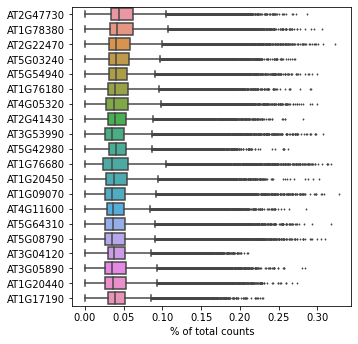

In [ ]:
sc.pl.highest_expr_genes(single_cell_arabidopsis_root_4_datasets, n_top=20, )